In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy



In [168]:
# Read in the data
gdp= pd.read_csv('gdp_percapita.csv', index_col= 'Country_Name')
co2= pd.read_csv('co2_per_capita(metric_tons).csv', index_col='Country_Name')

# Merge the data
df= pd.merge(gdp, co2, on='Country_Name')

In [8]:
# The GDP  summary statistics
print(df.Avg_percapita.describe())

from scipy.stats import trim_mean
trimmed_mean_gdp= trim_mean(df.Avg_percapita, 0.1)
print(trimmed_mean_gdp)

print(df.Avg_percapita.quantile(0.75)-df.Avg_percapita.quantile(0.25))

count       184.000000
mean      14095.141141
std       16633.741789
min         627.800000
25%        3200.950000
50%        8003.410000
75%       18022.277500
max      115547.480000
Name: Avg_percapita, dtype: float64
10973.305270270272
14821.3275


In [9]:
# The CO2 summary statistics
print(df.Avg_tons_percapita.describe())

trimmed_mean_co2= trim_mean(df.Avg_tons_percapita, 0.1)
print(trimmed_mean_co2)

print(df.Avg_tons_percapita.quantile(0.75)-df.Avg_tons_percapita.quantile(0.25))

count    184.000000
mean       4.378098
std        5.457403
min        0.030000
25%        0.610000
50%        2.285000
75%        6.362500
max       38.540000
Name: Avg_tons_percapita, dtype: float64
3.3700675675675673
5.7524999999999995


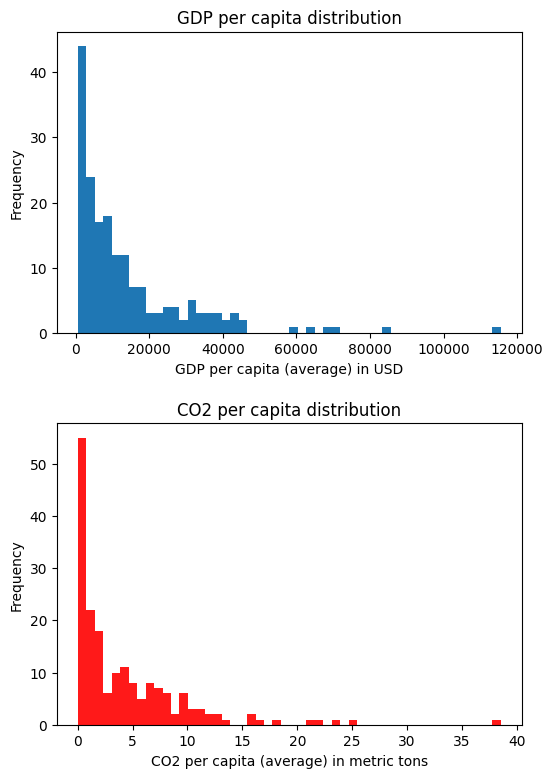

In [201]:
# ploting the GDP and CO2 distribution

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.hist(df.Avg_percapita, bins=50)
ax1.set_xlabel('GDP per capita (average) in USD')
ax1.set_ylabel('Frequency')
ax1.set_title('GDP per capita distribution')



ax2.hist(df.Avg_tons_percapita, bins=50, color='red', alpha=0.9)
ax2.set_xlabel('CO2 per capita (average) in metric tons')
ax2.set_ylabel('Frequency')
ax2.set_title('CO2 per capita distribution')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

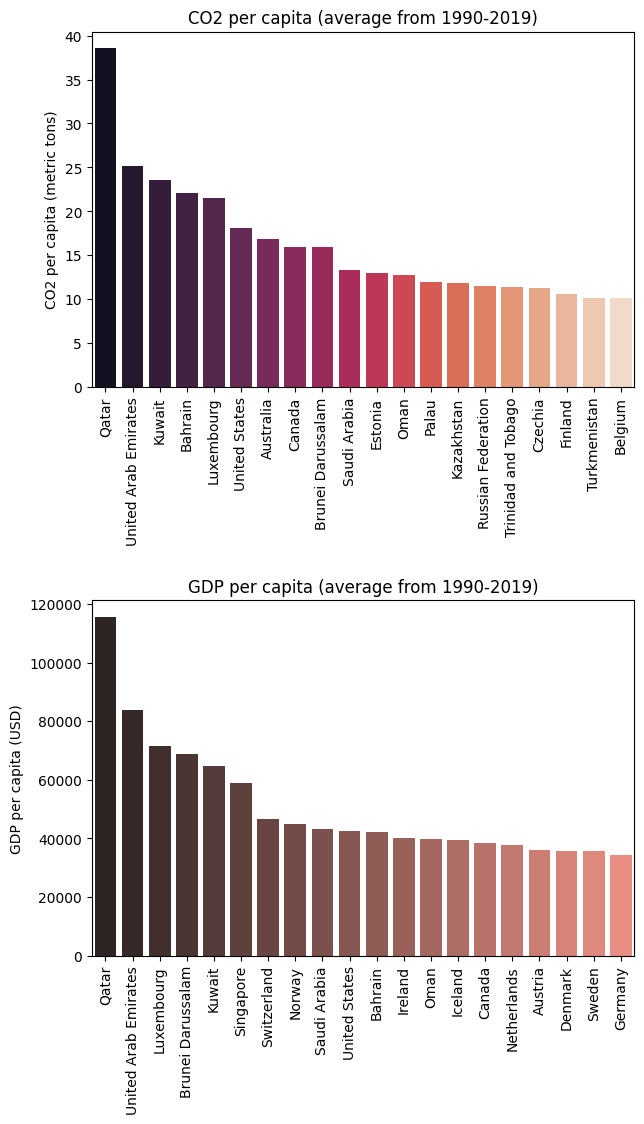

In [162]:
# Finding top 20 countries with highest GDP and CO2 per capita
gdp_top_20= df.nlargest(20, 'Avg_percapita')
co2_top_20= df.nlargest(20, 'Avg_tons_percapita')

# Plotting the top 20 countries with highest GDP and CO2 per capita
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 12))
sns.barplot(x=co2_top_20.index, y='Avg_tons_percapita', data=co2_top_20, ax=ax1, palette='rocket')
ax1.set_xticklabels(co2_top_20.index, rotation=90)
ax1.set_title('CO2 per capita (average from 1990-2019)')
ax1.set_xlabel('')
ax1.set_ylabel('CO2 per capita (metric tons)')

sns.barplot(x=gdp_top_20.index, y='Avg_percapita', data=gdp_top_20, ax=ax2, palette='dark:salmon')
ax2.set_xticklabels(gdp_top_20.index, rotation=90)
ax2.set_title('GDP per capita (average from 1990-2019)')
ax2.set_xlabel('')
ax2.set_ylabel('GDP per capita (USD)')

fig.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()

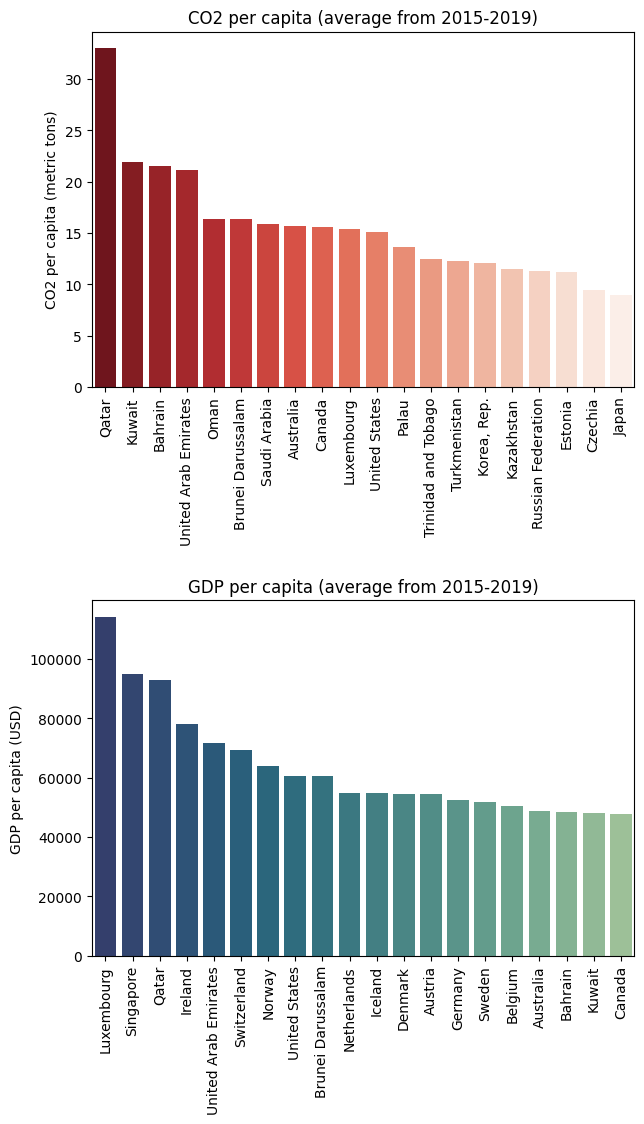

In [200]:
# Finding the top 20 countries with highest GDP and CO2 per capita in the last 5 years
last5years= df[['YR2015_x', 'YR2016_x', 'YR2017_x', 'YR2018_x', 'YR2019_x']]
last5years_avg= last5years.mean(axis=1)
last5years_co2= df[['YR2015_y', 'YR2016_y', 'YR2017_y', 'YR2018_y', 'YR2019_y']]
last5years_avg_co2= last5years_co2.mean(axis=1)

last5_df = pd.DataFrame({'index': df.index, 'average_gdp': last5years_avg, 'average_co2': last5years_avg_co2})
last5_top_20_gdp= last5_df.nlargest(20, 'average_gdp')
last5_top_20_co2= last5_df.nlargest(20, 'average_co2')

# Plotting the top 20 countries with highest GDP and CO2 per capita in the last 5 years
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 12))
sns.barplot(x='index', y= last5years_avg_co2, data= last5_top_20_co2, ax=ax1, palette='Reds_r')
ax1.set_xticklabels(last5_top_20_co2.index, rotation=90)
ax1.set_title('CO2 per capita (average from 2015-2019)')
ax1.set_xlabel('')
ax1.set_ylabel('CO2 per capita (metric tons)')

sns.barplot(x= 'index', y='average_gdp',  data= last5_top_20_gdp, ax=ax2, palette='crest_r')
ax2.set_xticklabels(last5_top_20_gdp.index, rotation=90)
ax2.set_title('GDP per capita (average from 2015-2019)')
ax2.set_xlabel('')
ax2.set_ylabel('GDP per capita (USD)')

fig.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()

In [13]:
# Establishing the correlation between GDP and CO2
from scipy.stats import pearsonr
corr_gdp_co2, p= pearsonr(df.Avg_percapita, df.Avg_tons_percapita)
print(corr_gdp_co2)

0.898771201411102


In [183]:
# Finding the outliers
for i, value in enumerate(df.Avg_percapita):
    if (value -np.mean(df.Avg_percapita)) > (3 * np.std(df.Avg_percapita)):
        print(f"{df.index[i]} is an outlier with the GDP per capita of {value}")

    
for i, value in enumerate(df.Avg_tons_percapita):
    if (value -np.mean(df.Avg_tons_percapita)) > (3 * np.std(df.Avg_tons_percapita)):
        print(f"{df.index[i]} is an outlier with the CO2 per capita of {value}")

Brunei Darussalam is an outlier with the GDP per capita of 68879.5
Kuwait is an outlier with the GDP per capita of 64711.34
Luxembourg is an outlier with the GDP per capita of 71626.18
Qatar is an outlier with the GDP per capita of 115547.48
United Arab Emirates is an outlier with the GDP per capita of 83891.35
Bahrain is an outlier with the CO2 per capita of 22.07
Kuwait is an outlier with the CO2 per capita of 23.59
Luxembourg is an outlier with the CO2 per capita of 21.56
Qatar is an outlier with the CO2 per capita of 38.54
United Arab Emirates is an outlier with the CO2 per capita of 25.11


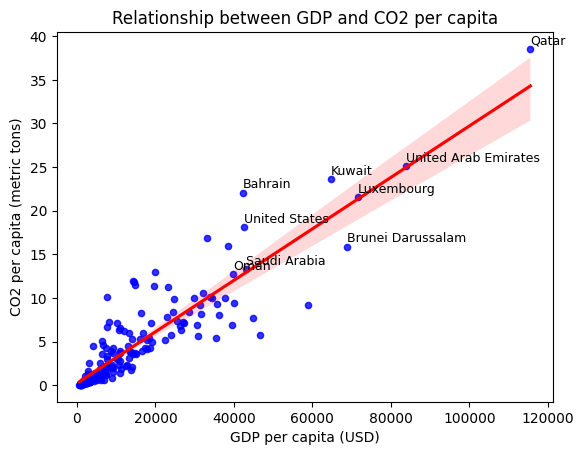

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     764.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.37e-67
Time:                        14:44:02   Log-Likelihood:                -421.10
No. Observations:                 184   AIC:                             846.2
Df Residuals:                     182   BIC:                             852.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2217      0.232      0.955      0.3

In [17]:
# Regression analysis
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
x= df.Avg_percapita.values.reshape(-1,1)
y= df.Avg_tons_percapita.values
model= LinearRegression()
model.fit(x,y)

# Plotting the regression line
ax= sns.regplot(x=x, y=y, color= 'blue', line_kws={'color':'red'}, scatter_kws={'s':20})
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('CO2 per capita (metric tons)')
ax.set_title('Relationship between GDP and CO2 per capita')

for i, txt in enumerate(df.index):
    if (df.Avg_percapita[i] - x_mean) > (1.5 * x_std) and (df.Avg_tons_percapita[i] - y_mean) > (1.5 * y_std):
        plt.text(df.Avg_percapita[i]+0.5, df.Avg_tons_percapita[i]+0.5, txt, fontsize=9)
plt.show()

# Printing the results of the regression analysis
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())